<a href="https://colab.research.google.com/github/fibleep/sludge-water-plant/blob/main/water_plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waste Management in a Water Purification Plant
Client X has two input streams with used water that they clean using two large tanks. These tanks are filled
with living bacteria that eat the contaminants in the water, i.e. cleaning it. The bacteria will be less active
or even die if they get too much or too little food (contaminants), too much or too little oxygen, or if the
correct pH is not maintained. If this happens the sludge concentration at the exit of the tanks, i.e. our
target variable, will be to high and additional expensive cleaning steps need to be performed. It is your job
to forecast this sludge concentration 4h in advance.

## Our Variables

|Name    |Description                         |Units|
|--------|------------------------------------|-----|
|InputC1 |O2 percentage in tank 1             |%    |
|InputC2 |Liquid to reduce the pH in tank 1   |l/h  |
|InputC3 |Filtered sludge going back to tank 1|m3/h |
|InputC4 |Outside air                         |Nm3/h|
|InputC5 |Height in tank 1                    |m    |
|InputC6 |Flowrate to pH measurement in tank 1|l/h  |
|InputC7 |pH of liquid in tank 1              |pH   |
|InputC8 |Flowrate to O2 measurement in tank 1|l/h  |
|InputC9 |O2 dissolved in tank 1              |mg/l |
|InputC10|Temperature of liquid in tank 1     |°C   |
|        |                                    |     |
|InputE1 |Consentration of sludge             |g/l  |
|InputE2 |Conductivity                        |mS   |
|InputE3 |NO3 dissolved                       |mg/l |
|        |                                    |     |
|InputD1 |O2 percentage in tank 2             |%    |
|InputD2 |Liquid to reduce the pH in tank 2   |l/h  |
|InputD3 |Filtered sludge going back to tank 2|m3/h |
|InputD4 |Outside air                         |Nm3/h|
|InputD5 |Height in tank 2                    |m    |
|InputD6 |Flowrate to pH measurement in tank 1|l/h  |
|InputD7 |pH of liquid in tank 2              |pH   |
|InputD8 |Flowrate to O2 measurement in tank 2|l/h  |
|InputD9 |O2 dissolved in tank 2              |mg/l |
|InputD10|Temperature of liquid in tank 2     |°C   |
|        |                                    |     |
|InputA1 |Temperature                         |°C   |
|InputA2 |Flowrate                            |m3/h |
|InputA3 |Amount of sludge in water           |mg/l |
|InputA4 |Conductivity                        |mS/cm|
|InputA5 |                                    |kg/h |
|InputA6 |pH                                  |pH   |
|        |                                    |     |
|InputB1 |Temperature                         |°C   |
|InputB2 |Flowrate                            |m3/h |
|InputB3 |Amount of sludge in water           |mg/l |
|InputB4 |Conductivity                        |mS/cm|
|InputB5 |                                    |kg/h |
|InputB6 |pH                                  |pH   |
|        |                                    |     |
|Target  |Target variable                     |mg/L |


# EDA

## Loading in data and installing necessary packages

In [ ]:
!git clone https://github.com/fibleep/sludge-water-plant.git
!pip install pandas numpy

fatal: destination path 'sludge-water-plant' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/sludge-water-plant/dataset/dataset.csv",index_col=[0])
df.index = pd.to_datetime(df.index)
df.head()

,InputC1,InputC2,InputC3,InputC4,InputC5,InputC6,InputC7,InputC8,InputC9,InputC10,...,InputA4,InputA5,InputA6,InputB1,InputB2,InputB3,InputB4,InputB5,InputB6,Target
2022-01-01 00:00:00,18.49650,18.81396,100.0696,618.6791,NaN,1931.360,7.272931,1878.295,1.549485,27.25480,...,60.10090,7.385031,7.081979,27.39823,20.89696,260.1674,2.193955,NaN,6.236635,NaN
2022-01-01 00:05:00,18.49731,18.70401,100.0715,613.7349,NaN,1929.365,7.273591,1878.252,1.552745,27.25177,...,60.09105,7.375766,7.136544,27.07825,26.92165,259.9575,2.187813,NaN,6.238485,NaN
2022-01-01 00:10:00,18.49693,18.59405,100.0733,608.7906,NaN,1924.322,7.274251,1878.209,1.556006,27.24874,...,60.08120,7.366502,7.085941,26.75828,14.01370,259.7475,2.181671,NaN,6.240336,NaN
2022-01-01 00:15:00,18.49603,18.48410,100.0751,603.8464,NaN,1919.279,7.274910,1878.167,1.559266,27.24572,...,60.07135,7.357237,6.743883,26.50328,5.78938,259.5375,2.175529,NaN,6.242187,NaN
2022-01-01 00:20:00,18.49512,18.37415,100.0770,598.9022,NaN,1914.235,7.275570,1878.124,1.562526,27.24269,...,60.06150,7.347972,6.621848,26.29828,39.27962,259.3275,2.169388,NaN,6.244037,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76474 entries, 2022-01-01 00:00:00 to 2022-09-23 13:45:00
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   InputC1   71948 non-null  float64
 1   InputC2   70943 non-null  float64
 2   InputC3   71116 non-null  float64
 3   InputC4   76396 non-null  float64
 4   InputC5   67461 non-null  float64
 5   InputC6   70914 non-null  float64
 6   InputC7   70852 non-null  float64
 7   InputC8   70828 non-null  float64
 8   InputC9   70880 non-null  float64
 9   InputC10  70802 non-null  float64
 10  InputE1   70871 non-null  float64
 11  InputE2   74587 non-null  float64
 12  InputE3   33120 non-null  float64
 13  InputD1   71923 non-null  float64
 14  InputD2   71190 non-null  float64
 15  InputD3   71138 non-null  float64
 16  InputD4   76398 non-null  float64
 17  InputD5   66353 non-null  float64
 18  InputD6   70881 non-null  float64
 19  InputD7   71128 non-null  float6

Looks like the data is collected every 5 minutes, NaN values are present, the target column can be NaN as well

In [ ]:
missing_values = df.isnull().sum() / len(df)
missing_values.sort_values(ascending=False).head(5)

InputE3    0.566912
InputB5    0.435547
InputA2    0.332427
InputD5    0.132346
InputA4    0.125847
dtype: float64

The ratio of nulls, it looks like E3, B5, A2 are null the most often

E3 -> NO3 dissolved

B5 -> Not Specified

A5 -> Not Specified


What can we deduce from this?

Some bacteria need nitrogen, I assume that's why NO3 is sometimes null and sometimes not.

B5 and A5 are not specified


In [ ]:
df['Target'].describe()

count    70286.000000
mean        51.028149
std         44.037615
min         -0.011699
25%         21.311235
50%         33.956840
75%         62.185650
max        203.460900
Name: Target, dtype: float64

This is sludge, in mg/L. The negative value is probably a mistake of the readings.

It looks like there's quite a bit of variation, there are some really high outliers but generally it should be around 30-40 mg/L

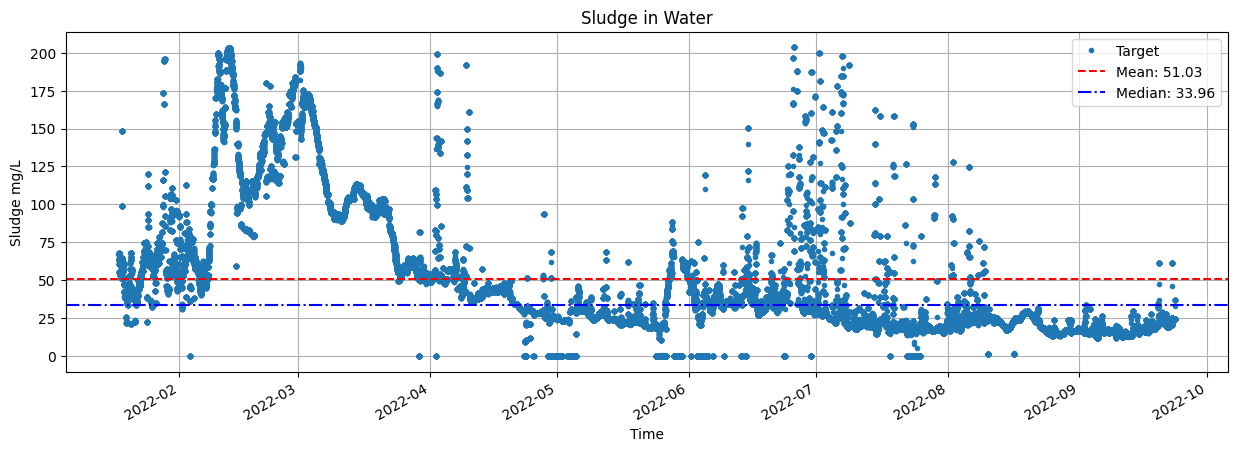

In [ ]:
df['Target'].plot(
    style='.',
    figsize=(15, 5),
    title='Sludge in Water',
    grid=True,
    xlabel="Time",
    ylabel="Sludge mg/L"
    )

mean_value = df['Target'].mean()
median_value = df['Target'].median()

plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(median_value, color='blue', linestyle='-.', label=f'Median: {median_value:.2f}')

plt.legend()
plt.show()

It looks like the data was pretty unstable throughout the year with huge spikes in February, March, April and July.